In [0]:
#@title Cifra melódica

#       MI RE# MI RE# MI si RE DO la
#       do mi la si
#       mi sol# si DO
#       MI RE# MI RE# MI si RE DO la
#       do mi la si
#       mi DO si la
#
#       si DO RE MI
#       sol FA MI RE
#        fa MI RE DO
#        mi RE DO si
#        mi mi MI MI mi mi
#
#        MI RE# MI RE# MI si RE DO la
#        do mi la si
#        mi sol# si DO
#        MI RE# MI RE# MI si RE DO la
#        do mi la si
#        mi DO si la
#
#        fa la DO
#        FA MI MI RE
#        LA# LA LA SOL FA MI RE DO la# la
#        la# la sol la la# DO
#        RE RE# MI
#        MI FA la DO
#        RE DO si DO RE sol DO
#
#        sol la si DO RE MI
#        SOL DO3 SI LA SOL FA MI RE SOL FA RE DO
#        sol la si DO RE MI
#        SOL DO3 SI LA SOL FA RE
#        MI FA MI RE#
#        MI FA MI RE#
#        MI FA MI RE#
#
#        MI RE# MI RE# MI si RE DO la
#        do mi la si
#        mi sol# si DO
#        MI RE# MI RE# MI si RE DO la
#        do mi la si
#        mi DO si la
#
#        la la la la RE DO# DO# si
#        SOL FA# FA# RE DO# si la sol fa#
#        fa# mi fa# sol la
#        si DO DO# DO# RE fa# la
#        si la sol# la si sol#
#
#        la MI mi MI fa# MI sol# MI la MI si MI
#        DO# MI LA SOL# FA# MI RE DO# si MI RE si
#        la MI mi MI fa# MI sol# MI la MI si MI
#        DO# MI LA SOL# FA# MI RE DO# si MI RE si
#
#        DO# RE DO# DO DO# sol# DO# DO DO# SOL# DO# DO DO#
#        sol# DO# DO DO#
#        sol# DO# DO DO#

In [14]:
#@title Leitura cifra
f = open('notas_fur_elise.txt', 'r')

linhas = []
linhas_juntas = []
for line in f:
    clean_line = line.replace('\n', '')
    if clean_line != '':
        linhas.append(clean_line.split(' '))
        for note in clean_line.split(' '):
            linhas_juntas.append(note)
    
print(linhas[0])
print(linhas[-1])

['MI', 'RE#', 'MI', 'RE#', 'MI', 'si', 'RE', 'DO', 'la']
['sol#', 'DO#', 'DO', 'DO#']


In [9]:
#@title Definindo notas
notas = ['do', 're', 'mi', 'fa', 'sol', 'la', 'si']
all_notas = []
for nota in notas:
    all_notas.append(nota)
    all_notas.append(nota+'#')
    all_notas.append(nota.upper())
    all_notas.append(nota.upper()+'#')
print(all_notas)

import numpy as np

all_notas = np.array(all_notas)
linhas_juntas = np.array(linhas_juntas)
# values = np.arange(1, all_notas.size+1)
# values

['do', 'do#', 'DO', 'DO#', 're', 're#', 'RE', 'RE#', 'mi', 'mi#', 'MI', 'MI#', 'fa', 'fa#', 'FA', 'FA#', 'sol', 'sol#', 'SOL', 'SOL#', 'la', 'la#', 'LA', 'LA#', 'si', 'si#', 'SI', 'SI#']


In [0]:
#@title Plot notas

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots()

def getIndex(nota):
    total_notas = all_notas.size
    for index, current_nota in enumerate(all_notas):
        if current_nota == nota:
            return index + 1

    #Não sabia que tinha do3 (e não achei lugar com uma explicação de leigo)
    for index, current_nota in enumerate(all_notas):
        if current_nota[0] == nota[0] and current_nota[1] == nota[1]:
            return index + 1
    return 1/0

colors = plt.get_cmap('viridis')(np.linspace(0, 1, all_notas.size + 1))

def draw_barchart(i):
    ax.clear()
    ax.set_xlim(0,all_notas.size)
    ax.set_ylim(0,5.1)
    x = [0]*linhas_juntas.size
    index = getIndex(linhas_juntas[i])
    x[index] = 1
    #ax.bar(index, 1)
    tam = 1.001
    qte = 5
    for j in range(i, i+qte):
        tam -= 1/qte 
        if j < linhas_juntas.size:
            index = getIndex(linhas_juntas[j])
            # ax.bar(index, tam)
            x[index] += tam
    for index in range(linhas_juntas.size - 1):
        if (x[index] == 0):
            value = 0
            cont = 0
            for j in range(index, linhas_juntas.size - 1):
                if x[j] != 0:
                    value = x[j]
                    break
                cont += 1
            if (value == 0):
                x[index] = x[index - 1]
            else:
                x[index] = x[index - 1] + (value - x[index - 1])/(cont + 1)
                ax.bar(index, x[index], color=colors[index])
        else:
            ax.bar(index, x[index], color=colors[index])
                        

    #print(getIndex(linhas_juntas[i]))
    #print(dir(ax))
    plt.box(False)
    #Remove as réguas
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
    #Remove os números do eixo x e y
    plt.axis('off')

draw_barchart(2)

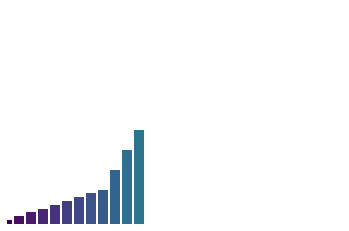

In [52]:
fig, ax = plt.subplots()
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(linhas_juntas.size))
HTML(animator.to_jshtml())
# or use animator.to_html5_video() or animator.save() 